In [1]:
!pip install ultralytics opencv-python numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



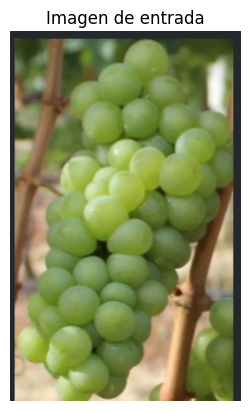

In [15]:
image_path = "/content/uvas.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Imagen de entrada")
plt.axis("off")
plt.show()


In [16]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


In [17]:
# Uvas verdes
lower_green  = np.array([30, 40, 40])
upper_green  = np.array([85, 255, 255])

# Uvas rojas — (dos rangos por el wrap del color)
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Uvas moradas
lower_purple = np.array([125, 40, 40])
upper_purple = np.array([155, 255, 255])


In [18]:
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) + cv2.inRange(hsv, lower_red2, upper_red2)
mask_purple = cv2.inRange(hsv, lower_purple, upper_purple)


In [19]:
kernel = np.ones((5,5), np.uint8)
AREA_MIN = 200   # Ajusta según tus imágenes

def limpiar(mask):
    # 1) Limpieza morfológica
    m = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, kernel)

    # 2) Eliminar componentes con área pequeña
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(m)

    # Creamos una nueva máscara vacía
    m_filtrada = np.zeros_like(m)

    for i in range(1, num_labels):  # ignorar fondo (label 0)
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= AREA_MIN:
            m_filtrada[labels == i] = 255  # mantener componente grande

    return m_filtrada


In [20]:
mask_green_clean  = limpiar(mask_green)
mask_red_clean    = limpiar(mask_red)
mask_purple_clean = limpiar(mask_purple)

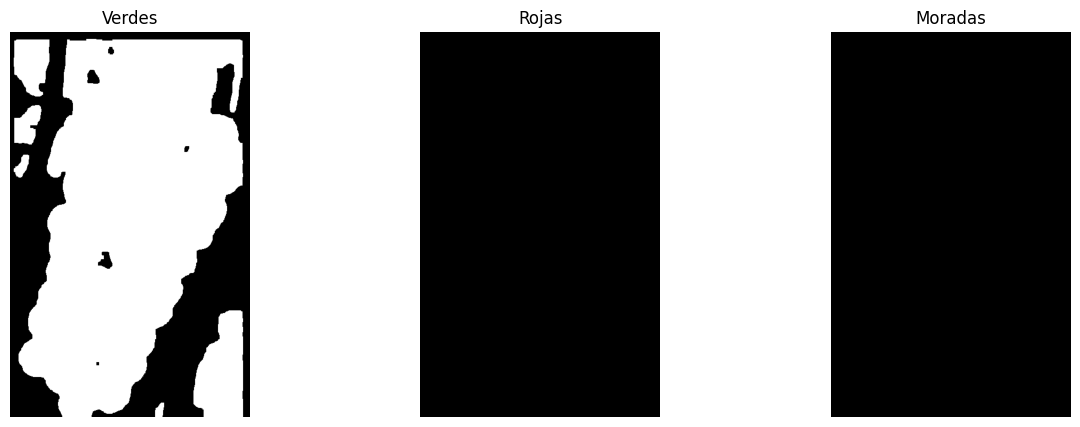

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(mask_green_clean, cmap="gray")
ax[0].set_title(f"Verdes")
ax[0].axis("off")

ax[1].imshow(mask_red_clean, cmap="gray")
ax[1].set_title(f"Rojas")
ax[1].axis("off")

ax[2].imshow(mask_purple_clean, cmap="gray")
ax[2].set_title(f"Moradas")
ax[2].axis("off")

plt.show()


In [22]:
# Imagen de uvas verdes aisladas
uvas_verdes = cv2.bitwise_and(img, img, mask=mask_green_clean)

# Imagen de uvas rojas aisladas
uvas_rojas = cv2.bitwise_and(img, img, mask=mask_red_clean)

# Imagen de uvas moradas aisladas
uvas_moradas = cv2.bitwise_and(img, img, mask=mask_purple_clean)


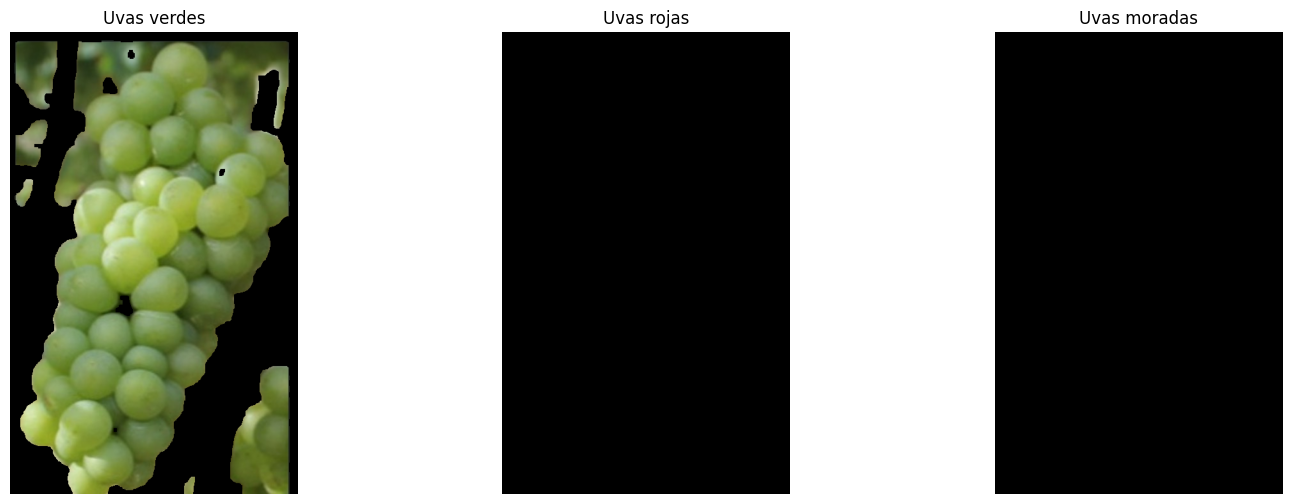

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(uvas_verdes)
ax[0].set_title("Uvas verdes")
ax[0].axis("off")

ax[1].imshow(uvas_rojas)
ax[1].set_title("Uvas rojas")
ax[1].axis("off")

ax[2].imshow(uvas_moradas)
ax[2].set_title("Uvas moradas")
ax[2].axis("off")

plt.show()


In [ ]:
cv2.imwrite("uvas_verdes.png", cv2.cvtColor(uvas_verdes, cv2.COLOR_RGB2BGR))
cv2.imwrite("uvas_rojas.png", cv2.cvtColor(uvas_rojas, cv2.COLOR_RGB2BGR))
cv2.imwrite("uvas_moradas.png", cv2.cvtColor(uvas_moradas, cv2.COLOR_RGB2BGR))
